# Regresión logística
---


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


In [10]:
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.keys()

(56000, 784)
(14000, 784)


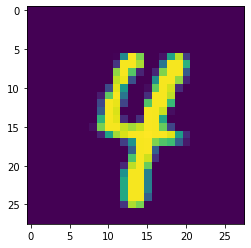

In [3]:
from sklearn.model_selection import train_test_split
import math
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=33)
print(X_train.shape)
print(X_test.shape)
#Mostramos una imagen del conjunto de datos
size = int(math.sqrt(X_train.shape[1]));
plt.imshow(X_train[33].reshape(size, size));

In [4]:
#Que passa amb aixo?
from sklearn.decomposition import PCA
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

(56000, 154)

In [ ]:
#De moment no
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test.shape

### 5: Carga la libreria de sklearn que permite entrenar una regresión logística.
[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
Instanciamos el modelo bajo el nombre `clf_lr`

In [5]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(C=1,  multi_class='ovr', tol=0.05)

In [ ]:
LogisticRegression?

### 6: Entrenamos el modelo y lo evaluamos

In [6]:
# Esta sentencia entrena el clasificador con nuestro conjunto de entrenamiento
clf_lr.fit(X_train, y_train)
# Como resultado vemos los diferentes parámetreos del método
# Vamos a comentar: C, random_state

C:\Users\gabri\Anaconda3\envs\MADM2019\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.05, verbose=0,
                   warm_start=False)

In [7]:
clf_lr.score(X_test, y_test)

0.8884285714285715

In [8]:
y_predict = clf_lr.predict(X_test)
print(y_test)
print(y_predict)

['0' '1' '7' ... '3' '0' '3']
['0' '1' '7' ... '3' '0' '3']


In [9]:
print(X_test.shape)
print(X_train.shape)


(14000, 154)
(56000, 154)


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show();

In [ ]:
10. / X_train.shape[0]